In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
cust_df = pd.read_csv('/content/Customers.csv')
prod_df = pd.read_csv('/content/Products.csv')
trans_df = pd.read_csv('/content/Transactions.csv')

In [ ]:
cust_df.head(5)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
prod_df.head(5)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
trans_df.head(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
print(cust_df.shape)
print(prod_df.shape)
print(trans_df.shape)

(200, 4)
(100, 4)
(1000, 7)


In [ ]:
{
    'Customers': cust_df.info(),
    'Products': prod_df.info(),
    'Transactions': trans_df.info()
}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


{'Customers': None, 'Products': None, 'Transactions': None}

In [ ]:
# Merge Transactions with Customers on CustomerID
transactions_customers_merged = pd.merge(trans_df, cust_df, on="CustomerID", how="inner")

# Merge the resulting dataset with Products on ProductID
full_merged_df = pd.merge(transactions_customers_merged, prod_df, on="ProductID", how="inner")

# Save the final merged dataset
full_merged_df.to_csv('Merged_Customers_Products_Transactions.csv', index=False)

print("Merged dataset saved as 'Merged_Customers_Products_Transactions.csv'.")

Merged dataset saved as 'Merged_Customers_Products_Transactions.csv'.


In [ ]:
df = pd.read_csv('/content/Merged_Customers_Products_Transactions.csv')

In [ ]:
df.head(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [ ]:
df.shape

(1000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [ ]:
df.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [ ]:
df = df.drop('Price_x', axis=1)

df = df.rename(columns={'Price_y': 'Price'})

In [ ]:
df.drop('TotalValue', axis=1, inplace=True)

In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate']).dt.date
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25,1,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27,1,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25,1,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26,2,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21,3,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24,1,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04,3,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05,4,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29,2,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


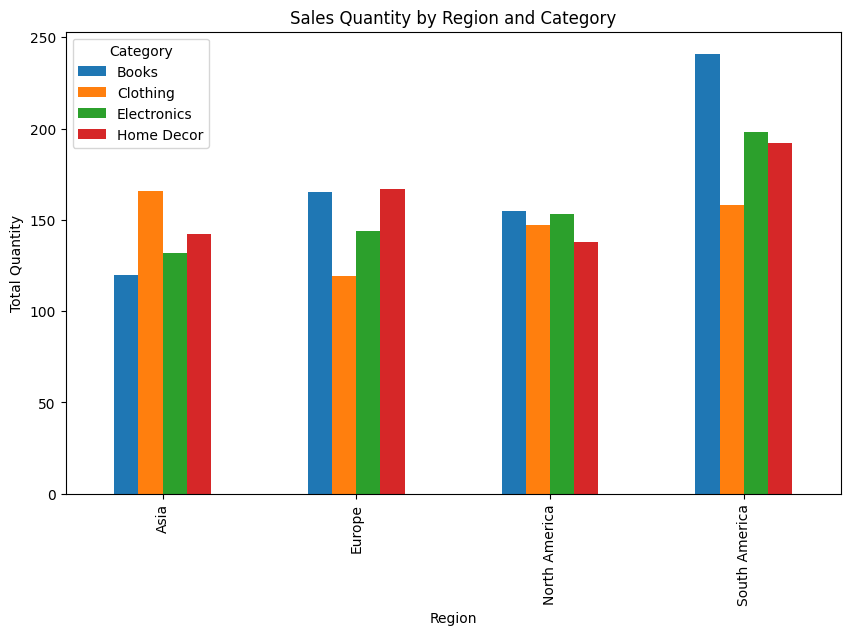

In [ ]:
# Group by region and category, then sum the quantity
region_category_sales = df.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()

region_category_sales.pivot(index='Region', columns='Category', values='Quantity').plot(kind='bar', figsize=(10, 6))
plt.title('Sales Quantity by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Quantity')
plt.show()

Insights:
- In the Asia region, the top-selling category is Clothing with a total quantity of 166.
- In the Europe region, the top-selling category is Home Decor with a total quantity of 167.
- In the North America region, the top-selling category is Books with a total quantity of 155.
- In the South America region, the top-selling category is Books with a total quantity of 241.

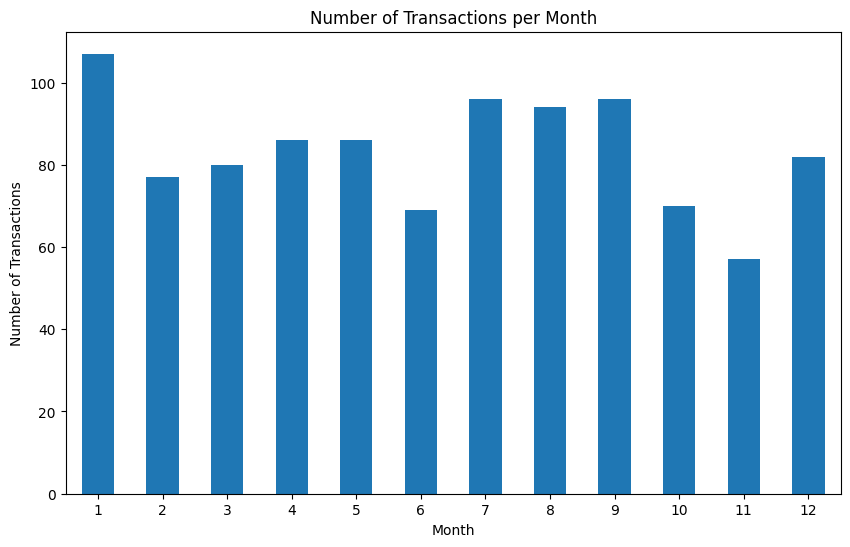

In [ ]:
# Extract the month from the 'TransactionDate' column
df['Month'] = pd.to_datetime(df['TransactionDate']).dt.month

# Group by month and count the transactions
monthly_transactions = df.groupby('Month')['TransactionID'].count()

# Find the months with the most transactions
max_transactions_months = monthly_transactions.nlargest(3)  # Get the top 3 months

# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Month')
plt.xticks(rotation=0)
plt.show()

Months with the most transactions:
  - January: 107 transactions
  - July: 96 transactions
  - September: 96 transactions

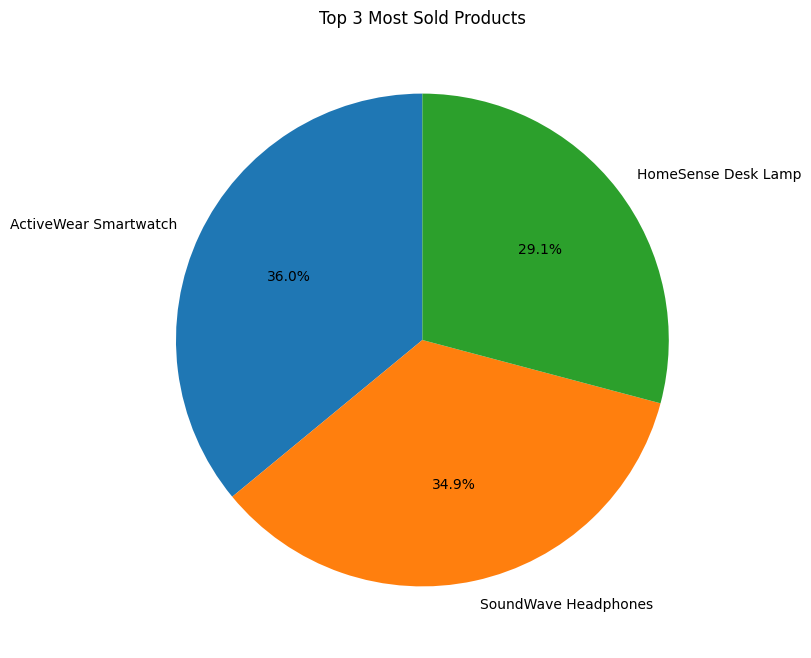

In [ ]:
# Group by product and sum the quantity, then sort in descending order
top_10_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Select the top 3 products
top_3_products = top_10_products.head(3)  # Get the top 3 products

plt.figure(figsize=(8, 8))
plt.pie(top_3_products.values, labels=top_3_products.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 3 Most Sold Products') # This title could be updated for clarity
plt.show()

Top 3 Most Sold Products:
- ActiveWear Smartwatch: 100
- SoundWave Headphones: 97
- HomeSense Desk Lamp: 81

In [ ]:
# Group by CustomerID and ProductName, then count the occurrences
repeat_orders = df.groupby(['CustomerID', 'ProductName'])['TransactionID'].count().reset_index()

# Filter out single occurrences to identify repeat orders
repeat_orders = repeat_orders[repeat_orders['TransactionID'] > 1]

# Display the repeat orders
print(repeat_orders)

total_repeat_orders = len(repeat_orders)
print(f"\nTotal number of repeat orders: {total_repeat_orders}")


    CustomerID                  ProductName  TransactionID
53       C0012      ActiveWear Cookware Set              2
127      C0026         SoundWave Headphones              2
132      C0028            ActiveWear Jacket              2
133      C0028        ActiveWear Smartphone              2
145      C0030              TechPro T-Shirt              2
173      C0038          HomeSense Desk Lamp              2
183      C0040            ActiveWear Jacket              2
218      C0047           SoundWave Cookbook              2
244      C0052          HomeSense Desk Lamp              3
289      C0062              SoundWave Jeans              2
304      C0065             TechPro Textbook              2
336      C0072            HomeSense T-Shirt              2
360      C0077            HomeSense Sweater              2
387      C0084         BookWorld Smartwatch              2
424      C0091  SoundWave Bluetooth Speaker              2
426      C0092             BookWorld Jacket             

Total number of repeat orders: **41**

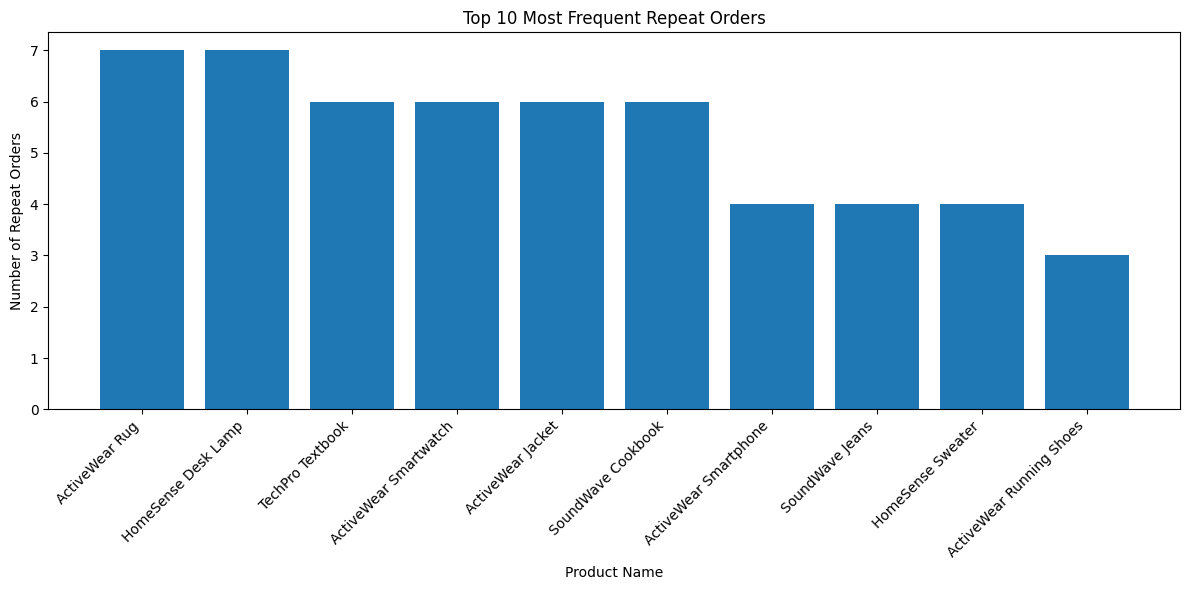

In [ ]:
#Top 10 Repeat orders
most_frequent_repeat_orders = repeat_orders.groupby('ProductName')['TransactionID'].sum().sort_values(ascending=False)

top_10_repeat_orders = most_frequent_repeat_orders.head(10)

#bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_repeat_orders.index, top_10_repeat_orders.values)
plt.xlabel("Product Name")
plt.ylabel("Number of Repeat Orders")
plt.title("Top 10 Most Frequent Repeat Orders")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Top 10 Most Frequent Repeat Orders:

ProductName
  - ActiveWear Rug             : 7
  - HomeSense Desk Lamp        : 7
  - TechPro Textbook           : 6
  - ActiveWear Smartwatch      : 6
  - ActiveWear Jacket          : 6
  - SoundWave Cookbook         : 6
  - ActiveWear Smartphone      : 4
  - SoundWave Jeans            : 4
  - HomeSense Sweater          : 4
  - ActiveWear Running Shoes   : 3

    Month         Region  Signups
0       1           Asia       20
1       1         Europe       22
2       1  North America       20
3       1  South America       21
4       2           Asia       13
5       2         Europe       14
6       2  North America       16
7       2  South America       23
8       3           Asia       14
9       3         Europe       17
10      3  North America       20
11      3  South America       14
12      4           Asia       15
13      4         Europe       13
14      4  North America       24
15      4  South America       18
16      5           Asia       12
17      5         Europe       17
18      5  North America       14
19      5  South America       24
20      6           Asia       12
21      6         Europe       14
22      6  North America       13
23      6  South America       21
24      7           Asia       20
25      7         Europe       19
26      7  North America       14
27      7  South America       27
28      8     

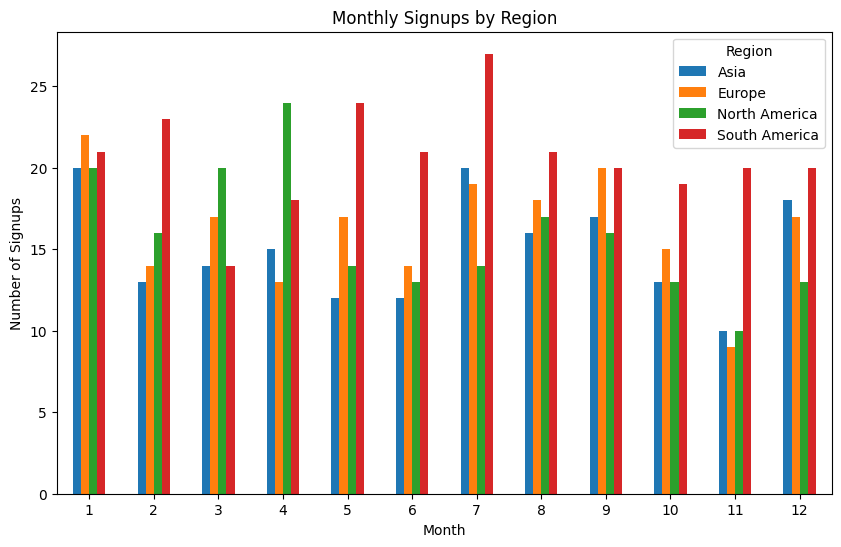

In [ ]:
# Group by month and region, then count the number of unique customers
monthly_signup_by_region = df.groupby(['Month', 'Region'])['CustomerID'].nunique().reset_index()

# Rename the 'CustomerID' column to 'Signups'
monthly_signup_by_region = monthly_signup_by_region.rename(columns={'CustomerID': 'Signups'})

# Print the result
print(monthly_signup_by_region)

# Create a pivot table for better visualization
pivot_table = monthly_signup_by_region.pivot(index='Month', columns='Region', values='Signups')

# Plot the data
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Signups by Region')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.show()

Insights

Asia
- Peaks: January, July and December.
- Lows: November, May, and June.
- Consistent performance in the early months but experiences notable drops in mid-year.

**Europe**
- Peaks: January, March, and September.
- Lows: November and April.
- Europe has a sharp decline in November, suggesting possible seasonal or regional factors.

**North America**
- Peaks: April, March, and January.
- Lows: November and June.
- Steady throughout the year, with slightly reduced activity mid-year and late-year.

South America
- Peaks: July, May, and January.
- Lows: March .
- South America leads in signup numbers for most months, showing strong performance consistently.

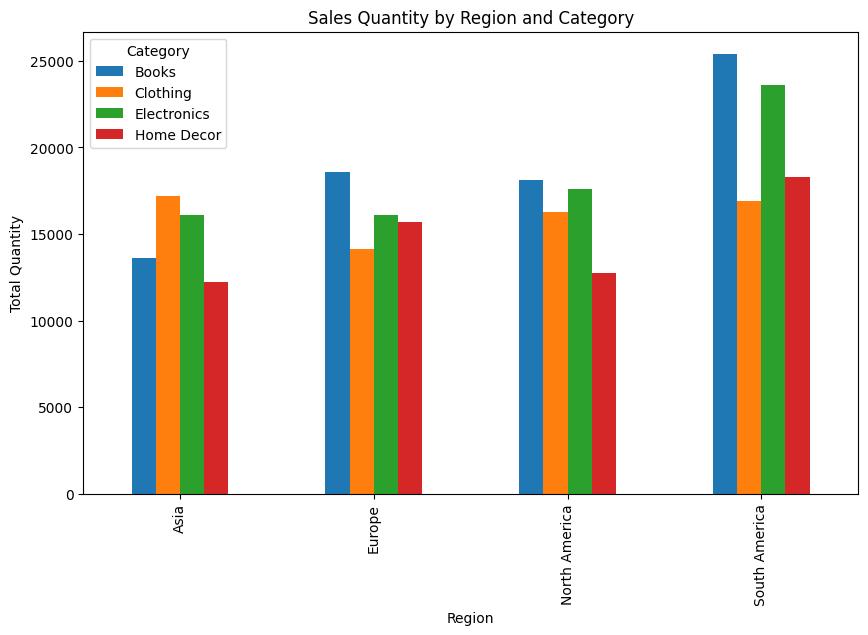

In [ ]:
# Group by region and category, then sum the quantity
region_category_sales = df.groupby(['Region', 'Category'])['Price'].sum().reset_index()

region_category_sales.pivot(index='Region', columns='Category', values='Price').plot(kind='bar', figsize=(10, 6))
plt.title('Sales Quantity by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Quantity')
plt.show()

# stop_categories_by_region = region_category_sales.loc[region_category_sales.groupby('Region')['Price'].idxmax()]
# stop_categories_by_region

Insight:
- South America has the highest sales in the Books category, with 25,409.
- Europe has the second-highest sales in the Books category, with 18,557.
- North America ranks third in the Books category, with sales of 18,135.
- Asia records the highest sales in the Clothing category, with 17,200.